In [49]:
if(!dir.exists("Functions/")){
    setwd("../../")
    if(!dir.exists("Functions")){
        setwd("M:/lecospec/lecospec/")
    }
}
source("Functions/lecospectR.R", echo = FALSE)

In [50]:
img_data_path <- "Data/gs/x_train/img_only_bands.csv"
img_data <- subset(
    read.csv(img_data_path, header = TRUE), 
    select = -X
    )
head(img_data)

,X402.593_5nm,X407.593_5nm,X412.593_5nm,X417.593_5nm,X422.593_5nm,X427.593_5nm,X432.593_5nm,X437.593_5nm,X442.593_5nm,X447.593_5nm,⋯,X947.593_5nm,X952.593_5nm,X957.593_5nm,X962.593_5nm,X967.593_5nm,X972.593_5nm,X977.593_5nm,X982.593_5nm,X987.593_5nm,X992.593_5nm
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.02762950,0.02918722,0.03074185,0.03228399,0.03380342,0.03527249,0.03666635,0.03795165,0.03907399,0.03997908,⋯,0.2782163,0.2766452,0.2741204,0.2703051,0.2654891,0.2595665,0.2509600,0.2393916,0.2262643,0.2116886
2,0.01533623,0.01552180,0.01571935,0.01593363,0.01617408,0.01644385,0.01674312,0.01707574,0.01743688,0.01782277,⋯,0.1921645,0.1886254,0.1849704,0.1808823,0.1758336,0.1696562,0.1623340,0.1539049,0.1447857,0.1353639
3,0.04302270,0.04275670,0.04254037,0.04239005,0.04232247,0.04235422,0.04249037,0.04273396,0.04307974,0.04351184,⋯,0.2352763,0.2355116,0.2361213,0.2369639,0.2380110,0.2392029,0.2405110,0.2419406,0.2435205,0.2452388
4,0.02544771,0.02303027,0.02112182,0.01981552,0.01910262,0.01894225,0.01918603,0.01961713,0.02010186,0.02054558,⋯,0.1537489,0.1429680,0.1338775,0.1269113,0.1241614,0.1273525,0.1372715,0.1545042,0.1787625,0.2079127
5,0.01997481,0.02049219,0.02090960,0.02123028,0.02146525,0.02162558,0.02173285,0.02180948,0.02187333,0.02194517,⋯,0.1657231,0.1641468,0.1633234,0.1629302,0.1625912,0.1619329,0.1606907,0.1591781,0.1576717,0.1562453
6,0.01931844,0.01941683,0.01964067,0.02001486,0.02054380,0.02119869,0.02193446,0.02270658,0.02346866,0.02416637,⋯,0.2270523,0.2224961,0.2195869,0.2192226,0.2217085,0.2266891,0.2338915,0.2422941,0.2509096,0.2594246


In [51]:
target_path <- "Data/gs/y_train/img_only_bands.csv"
targets <- read.csv(target_path, header = TRUE)$x %>% as.factor()


In [63]:
colnames(img_data)

[1] "X402.593_5nm" "X407.593_5nm" "X412.593_5nm" "X417.593_5nm" "X422.593_5nm"
  [6] "X427.593_5nm" "X432.593_5nm" "X437.593_5nm" "X442.593_5nm" "X447.593_5nm"
 [11] "X452.593_5nm" "X457.593_5nm" "X462.593_5nm" "X467.593_5nm" "X472.593_5nm"
 [16] "X477.593_5nm" "X482.593_5nm" "X487.593_5nm" "X492.593_5nm" "X497.593_5nm"
 [21] "X502.593_5nm" "X507.593_5nm" "X512.593_5nm" "X517.593_5nm" "X522.593_5nm"
 [26] "X527.593_5nm" "X532.593_5nm" "X537.593_5nm" "X542.593_5nm" "X547.593_5nm"
 [31] "X552.593_5nm" "X557.593_5nm" "X562.593_5nm" "X567.593_5nm" "X572.593_5nm"
 [36] "X577.593_5nm" "X582.593_5nm" "X587.593_5nm" "X592.593_5nm" "X597.593_5nm"
 [41] "X602.593_5nm" "X607.593_5nm" "X612.593_5nm" "X617.593_5nm" "X622.593_5nm"
 [46] "X627.593_5nm" "X632.593_5nm" "X637.593_5nm" "X642.593_5nm" "X647.593_5nm"
 [51] "X652.593_5nm" "X657.593_5nm" "X662.593_5nm" "X667.593_5nm" "X672.593_5nm"
 [56] "X677.593_5nm" "X682.593_5nm" "X687.593_5nm" "X692.593_5nm" "X697.593_5nm"
 [61] "X702.593_5nm" "X707.593_5nm" "X712.593_5nm" "X717.593_5nm" "X722.593_5nm"
 [66] "X727.593_5nm" "X732.593_5nm" "X737.593_5nm" "X742.593_5nm" "X747.593_5nm"
 [71] "X752.593_5nm" "X757.593_5nm" "X762.593_5nm" "X767.593_5nm" "X772.593_5nm"
 [76] "X777.593_5nm" "X782.593_5nm" "X787.593_5nm" "X792.593_5nm" "X797.593_5nm"
 [81] "X802.593_5nm" "X807.593_5nm" "X812.593_5nm" "X817.593_5nm" "X822.593_5nm"
 [86] "X827.593_5nm" "X832.593_5nm" "X837.593_5nm" "X842.593_5nm" "X847.593_5nm"
 [91] "X852.593_5nm" "X857.593_5nm" "X862.593_5nm" "X867.593_5nm" "X872.593_5nm"
 [96] "X877.593_5nm" "X882.593_5nm" "X887.593_5nm" "X892.593_5nm" "X897.593_5nm"
[101] "X902.593_5nm" "X907.593_5nm" "X912.593_5nm" "X917.593_5nm" "X922.593_5nm"
[106] "X927.593_5nm" "X932.593_5nm" "X937.593_5nm" "X942.593_5nm" "X947.593_5nm"
[111] "X952.593_5nm" "X957.593_5nm" "X962.593_5nm" "X967.593_5nm" "X972.593_5nm"
[116] "X977.593_5nm" "X982.593_5nm" "X987.593_5nm" "X992.593_5nm"

 [1] "N"                   "Y"                   "costs"              
 [4] "itercosts"           "origD"               "perplexity"         
 [7] "theta"               "max_iter"            "stop_lying_iter"    
[10] "mom_switch_iter"     "momentum"            "final_momentum"     
[13] "eta"                 "exaggeration_factor"


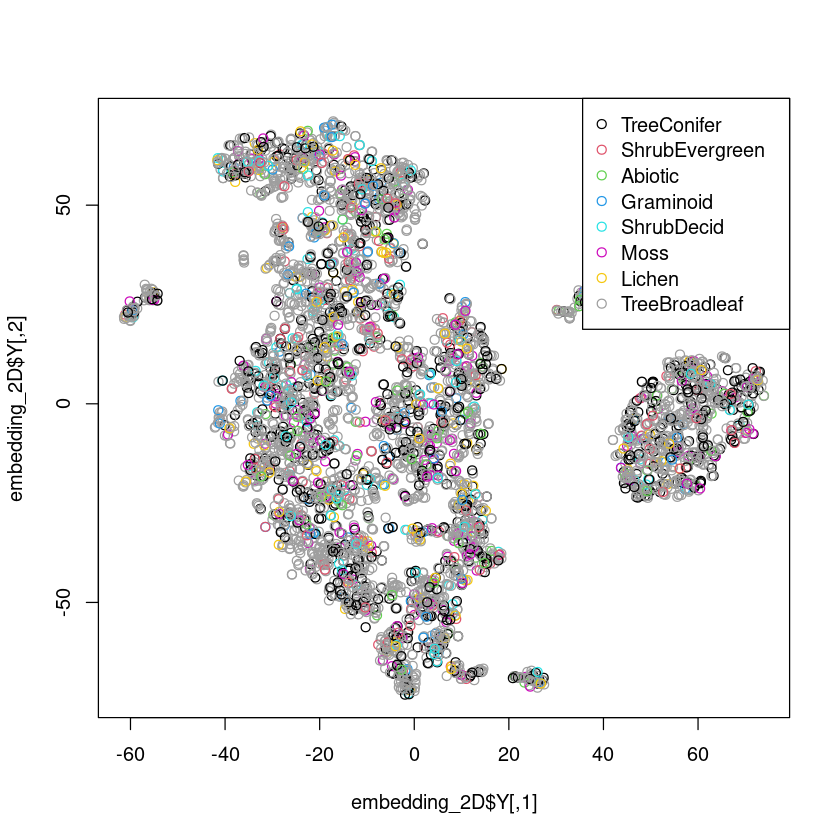

In [65]:
library(Rtsne)
unique_indices <- img_data[!duplicated(img_data),]
normalized_veg_indices <- Rtsne::normalize_input(
    unique_indices %>% 
    as.matrix()
    )
embedding_2D <- Rtsne::Rtsne(unique_indices %>% as.matrix(), dims = 2, PCA = FALSE, max_iter = 10000)
print(names(embedding_2D))

plot(embedding_2D$Y, col = as.factor(targets))
par(xpd=T)
legend("topright", legend = unique(targets), col = seq_along(unique(targets)), pch = 1)

In [53]:
# fit a PCA to the ground spectra
pca_fit <- stats::prcomp(img_data, center = FALSE, scale. = FALSE)
print(summary(pca_fit))
pca_training_data <- predict(pca_fit, img_data)


Importance of components:
                         PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.188 0.37994 0.10575 0.07798 0.05992 0.05422 0.04983
Proportion of Variance 0.963 0.02903 0.00225 0.00122 0.00072 0.00059 0.00050
Cumulative Proportion  0.963 0.99201 0.99426 0.99548 0.99620 0.99680 0.99730
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.04527 0.04035 0.03889 0.03351 0.03198 0.03045 0.02931
Proportion of Variance 0.00041 0.00033 0.00030 0.00023 0.00021 0.00019 0.00017
Cumulative Proportion  0.99771 0.99804 0.99834 0.99856 0.99877 0.99896 0.99913
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.02484 0.02344 0.02223 0.01936 0.01784 0.01717 0.01587
Proportion of Variance 0.00012 0.00011 0.00010 0.00008 0.00006 0.00006 0.00005
Cumulative Proportion  0.99925 0.99936 0.99946 0.99954 0.99960 0.99966 0.99971
                          PC22    

In [66]:
colnames(pca_training_data)

[1] "PC1"   "PC2"   "PC3"   "PC4"   "PC5"   "PC6"   "PC7"   "PC8"   "PC9"  
 [10] "PC10"  "PC11"  "PC12"  "PC13"  "PC14"  "PC15"  "PC16"  "PC17"  "PC18" 
 [19] "PC19"  "PC20"  "PC21"  "PC22"  "PC23"  "PC24"  "PC25"  "PC26"  "PC27" 
 [28] "PC28"  "PC29"  "PC30"  "PC31"  "PC32"  "PC33"  "PC34"  "PC35"  "PC36" 
 [37] "PC37"  "PC38"  "PC39"  "PC40"  "PC41"  "PC42"  "PC43"  "PC44"  "PC45" 
 [46] "PC46"  "PC47"  "PC48"  "PC49"  "PC50"  "PC51"  "PC52"  "PC53"  "PC54" 
 [55] "PC55"  "PC56"  "PC57"  "PC58"  "PC59"  "PC60"  "PC61"  "PC62"  "PC63" 
 [64] "PC64"  "PC65"  "PC66"  "PC67"  "PC68"  "PC69"  "PC70"  "PC71"  "PC72" 
 [73] "PC73"  "PC74"  "PC75"  "PC76"  "PC77"  "PC78"  "PC79"  "PC80"  "PC81" 
 [82] "PC82"  "PC83"  "PC84"  "PC85"  "PC86"  "PC87"  "PC88"  "PC89"  "PC90" 
 [91] "PC91"  "PC92"  "PC93"  "PC94"  "PC95"  "PC96"  "PC97"  "PC98"  "PC99" 
[100] "PC100" "PC101" "PC102" "PC103" "PC104" "PC105" "PC106" "PC107" "PC108"
[109] "PC109" "PC110" "PC111" "PC112" "PC113" "PC114" "PC115" "PC116" "PC117"
[118] "PC118" "PC119"

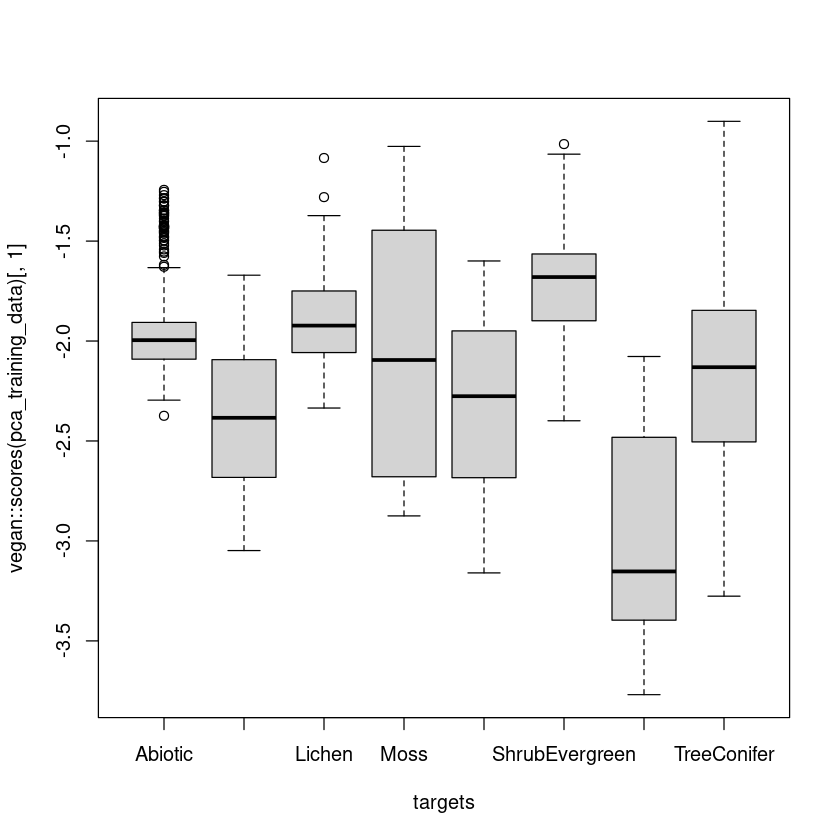

In [54]:
boxplot(vegan::scores(pca_training_data)[,1]~targets)

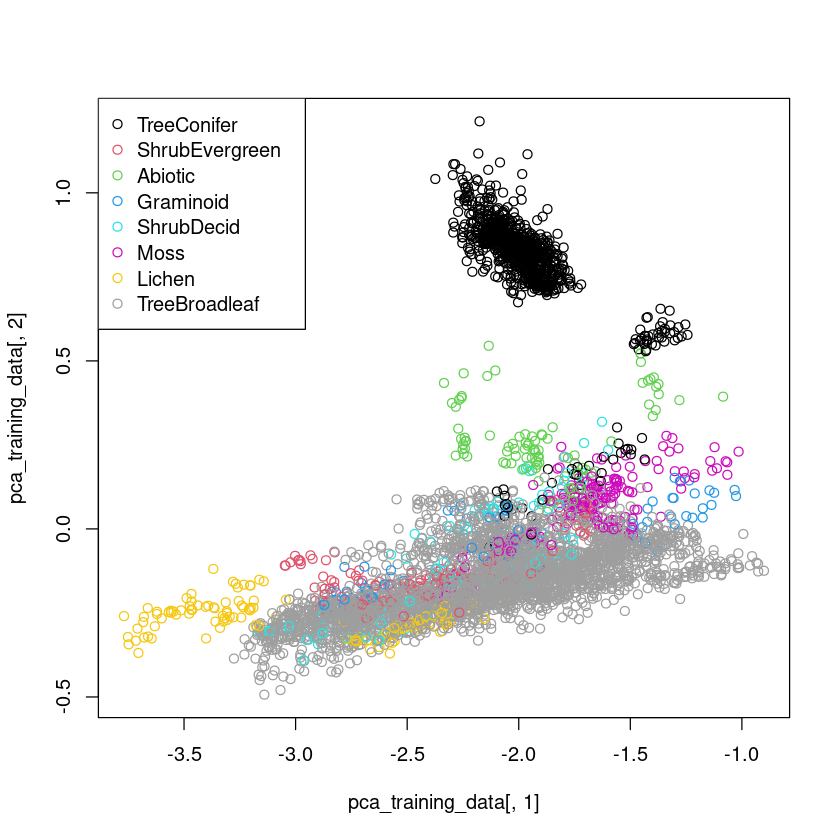

In [58]:
plot(
    pca_training_data[,1],
    pca_training_data[,2],
    col = targets
    )
legend("topleft", legend = unique(targets), col = seq_along(unique(targets)), pch = 1)


In [80]:
plt <- ggplot2::ggplot(data = as.data.frame(pca_training_data)) +
    ggplot2::geom_point(
        aes(
            x = PC1,
            y = PC2,
            color = targets
        )
    ) + 
    ggplot2::theme_light() + 
    ggplot2::labs(color = "Plant Functional Type") +
    ggplot2::ggtitle("Principle Component Axes by Plant Functional Type") + 
    ggplot2::xlab("First Principle Component") +
    ggplot2::ylab("Second Principle Component")


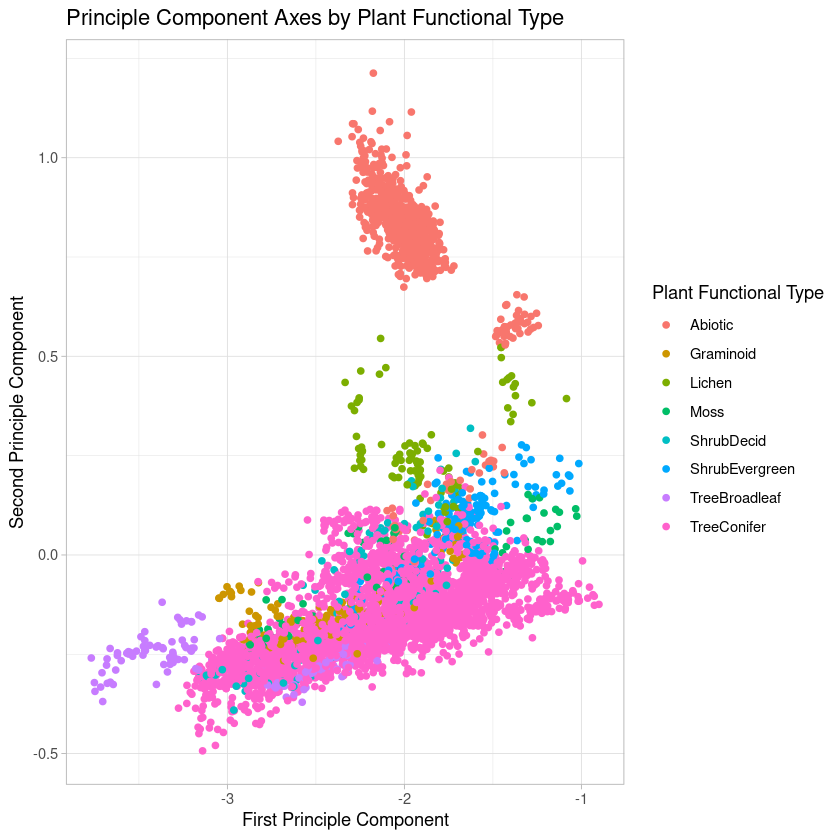

In [83]:
plt